In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import plotly.graph_objects as go
import plotly.express as px
import plotly

In [2]:
data = pd.read_csv('data_cluster_test2.csv')
pd.set_option('display.max_columns', None)
data

,id,listing_url,host_id,host_url,host_since,host_location,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Host_location_germany,Host_location_berlin,host_response_rate_category,bathrooms_type,bathroom_qty,aman,Kitchen,Heating,Essentials,Washer,Long term stays allowed,Hair dryer,Wifi,Hangers,Dedicated workspace,Iron,Smoke alarm,Dishes and silverware,Shampoo,Refrigerator,Cooking basics,Hot water,Bed linens,Stove,Coffee maker,Oven,TV,Free street parking,Wifi.1,Host greets you,Microwave,Elevator,Extra pillows and blankets,Dishwasher,Luggage dropoff allowed,Private entrance,Fire extinguisher,Carbon monoxide alarm,Hot water.1,Patio or balcony,Dryer,Cable TV,Bathtub,Lock on bedroom door,First aid kit,Shower gel,Baking sheet,Hot water kettle,Free parking on premises,Single level home,Dining table,Freezer,Room-darkening shades,Wine glasses,Paid parking off premises,TV with standard cable,Toaster,Cleaning products,First aid kit.1,High chair,Body soap,Essentials,Dishwasher.1,Drying rack for clothing,Backyard,Crib
0,2015,https://www.airbnb.com/rooms/2015,2217,https://www.airbnb.com/users/show/2217,1970,"Key Biscayne, Florida, United States",within an hour,1,5.0,['email'],1,0,Brunnenstr. Süd,Mitte,52.533050,13.403940,Entire guesthouse,Entire home/apt,2,1,2,"[""Essentials"", ""Heating"", ""Backyard"", ""Long te...",53.0,90,1125,2.0,90.0,1125.0,1125.0,84.3,1125.0,1,28,58,64,326,144,10,0,2016-04-11,2021-11-02,4.66,4.79,4.52,4.88,4.90,4.96,4.58,0,4,4,0,0,2.08,False,False,High,private,1.0,"[Essentials, Heating, Backyard, Long term stay...",1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,3176,https://www.airbnb.com/rooms/3176,3718,https://www.airbnb.com/users/show/3718,1970,"Coledale, New South Wales, Australia",no request,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",1,1,Prenzlauer Berg Südwest,Pankow,52.534710,13.418100,Entire rental unit,Entire home/apt,4,1,2,"[""Essentials"", ""Heating"", ""Smoke alarm"", ""Iron...",90.0,92,1125,92.0,92.0,1125.0,1125.0,92.0,1125.0,1,0,0,0,170,147,1,0,2009-06-20,2021-01-01,4.63,4.68,4.53,4.64,4.69,4.92,4.63,0,1,1,0,0,0.97,False,False,No request,private,1.0,"[Essentials, Heating, Smoke alarm, Iron, Washe...",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7071,https://www.airbnb.com/rooms/7071,17391,https://www.airbnb.com/users/show/17391,1970,"Berlin, Berlin, Germany",no request,1,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,1,Helmholtzplatz,Pankow,52.543010,13.415340,Private room in rental unit,Private room,2,1,2,"[""Essentials"", ""Heating"", ""Refrigerator"", ""Hai...",33.0,1,10,1.0,1.0,10.0,10.0,1.0,10.0,1,0,0,0,0,293,0,0,2009-08-18,2020-03-31,4.83,4.85,4.90,4.86,4.85,4.91,4.71,1,1,0,1,0,1.95,True,True,No re

# top hosts, with more than 10 listings

In [3]:
#which hsost have themost listings
top_hosts=data.host_id.value_counts(ascending=False).head(40)
top_hosts

8250486      49
378071271    34
3003519      29
108025548    28
8912086      26
23904144     25
1625771      21
12360        20
210700814    20
335573202    20
87442687     18
4032095      18
190957759    18
193643890    18
79430806     18
52747435     17
342965       15
240204649    15
27952946     14
1496069      14
309128523    14
265635773    14
155105708    13
718939       13
1391772      13
73158        13
1194258      13
386848467    13
304345361    13
167881332    12
224691394    12
16079116     11
1654885      10
55398739     10
265415759    10
26836482     10
5472105      10
421235453    10
909226       10
163384       10
Name: host_id, dtype: int64

##### 8250486: is a hostel, however they didnt put it into category hotel for listing types

##### 378071271: Flo a single person who says from himself is an entrepreneur

##### 3003519: Simon private person, looks like several flats in 4 different houses

##### 108025548: Baharbin privat person, 10 different locations where all flats are inside

##### 1391772: desribes itself as sunflower hostel: but than all locations are in slighlty different spots around one neigboorhood

#### it seems like despite filterng out listing type hotel, some aribnbs are hostels or bed&breakfast and are in category of private room or shared room or entire home (but not too many)

In [4]:
top_hosts_df=pd.DataFrame(top_hosts).reset_index()


In [5]:
top_hosts_df= top_hosts_df.astype({"index": str})

In [6]:
top_hosts_df.dtypes

index      object
host_id     int64
dtype: object

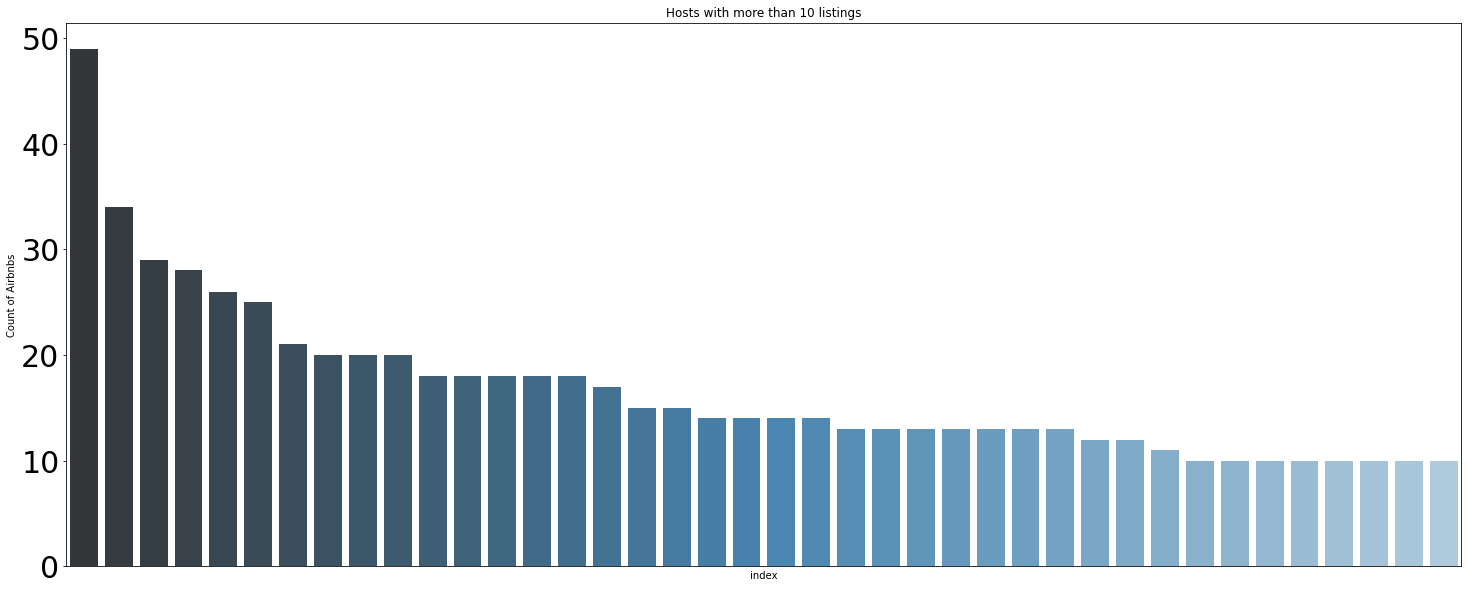

In [136]:
fig, ax = plt.subplots(figsize=(25,10))

palette = sns.color_palette("Blues_d",n_colors=40)
palette.reverse()

ht=sns.barplot(x="index", y="host_id", data=top_hosts_df,
                 palette=palette)

ht.set_title('Hosts with more than 10 listings')
ht.set_ylabel('Count of Airbnbs')
ht.set_xticks([])

plt.yticks(fontsize= 30)

#plt.figure(1)
plt.savefig('host_wit_more_than_10_listings.png', bbox_inches='tight', pad_inches=0)

### hosts that have more than 10 listings

## get property type of hosts

In [8]:
 top_host_roperty_type=[]

for i in list(top_hosts_df['index']):
    type=max(data.property_type[data['host_id']==int(i)])
    top_host_roperty_type.append(type)



In [9]:
pd.DataFrame(top_host_roperty_type).value_counts()


Entire rental unit                    22
Entire serviced apartment              9
Shared room in hostel                  3
Private room in rental unit            2
Entire residential home                1
Private room in residential home       1
Private room in serviced apartment     1
Room in aparthotel                     1
dtype: int64

In [10]:
df=pd.DataFrame(top_host_roperty_type)
df.columns=['type']

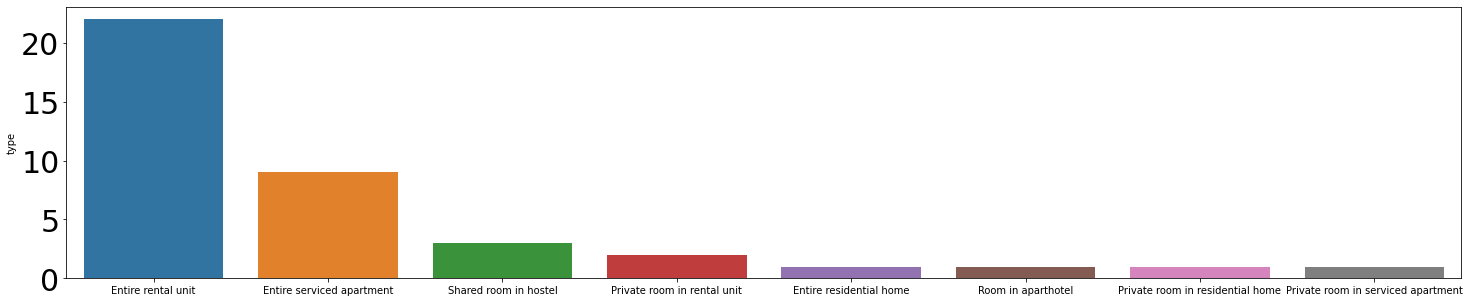

In [137]:
fig, ax = plt.subplots(figsize=(25,5))

sns.barplot(x=df.type.value_counts().index, y=df.type.value_counts())
plt.yticks(fontsize= 30)
plt.xticks(fontsize= 10)


#plt.figure(1)
plt.savefig('property_type_top_hosts.png', bbox_inches='tight', pad_inches=0)

### from top host with more than 10 listings look at detailed property type

In [12]:
data.property_type.nunique() #there are 58 different detailed property types

58

### despite filtering out hotel type airbnb: here are some host which have listings as a shared room in hostel, room in aparthotel (but very few)

# percentage of multi listings in berlin

In [154]:
#function thans bins: listings:host_id and host_listings_count and availability

def host_binning(bins, labels, hosts = False):
    #groupby or copy dataframe
    if hosts:
        df = data.groupby('host_id')[['calculated_host_listings_count',
                                             'availability_365']].mean()
    else:
        df = data.copy()
        
  
    df['num_listings_cut'] = pd.cut(df.calculated_host_listings_count, bins)
    num_listings_percent = df.num_listings_cut.value_counts(normalize=True)  # get percentage

    # get availability
    availability_num_listings = pd.DataFrame(df.groupby('num_listings_cut')['availability_365'].mean()).reset_index()

    # make dataframe
    df = pd.DataFrame(num_listings_percent).reset_index().rename(columns = {'index': 'cut', 
                                                                            'num_listings_cut': 'perc_listings'})
    # sort,concat,merge
    df = df.sort_values(by='cut').reset_index(drop=True) 
    df = pd.concat([labels, df], axis=1).rename(columns = {0: 'labels'})
    df = df.merge(availability_num_listings, left_on='cut', 
                           right_on='num_listings_cut').drop(columns = 'num_listings_cut')
    
    # rounded percantage
    df['perc_listings_clean'] = df.perc_listings.apply(
        lambda x: 100*round(x,4))
    
    return df

In [155]:
#make bins
bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 3),(3,10),(10,100)])

#get labels
labels = pd.Series(['1 accomodation','2-3 accomodations','4-10 accomodations','11+ accomodations'])

# create the dataframe
listings_info_df = host_binning(bins, labels)

In [156]:
listings_info_df = listings_info_df.rename(columns = {'labels': 'Host Listings',
                                                     'perc_listings': 'Percentage of Listings'})
listings_info_df

,Host Listings,cut,Percentage of Listings,availability_365,perc_listings_clean
0,1 accomodation,"(-1, 1]",0.724843,53.058134,72.48
1,2-3 accomodations,"(1, 3]",0.151624,112.296912,15.16
2,4-10 accomodations,"(3, 10]",0.075992,225.280569,7.60
3,11+ accomodations,"(10, 100]",0.047540,240.928788,4.75


In [157]:
fig = px.pie(listings_info_df, names = 'Host Listings', values='Percentage of Listings', 
             title='Percentage of listings with a host that owns 1 or more property',
            color_discrete_sequence = px.colors.sequential.Peach)
fig.show()

### 72% listings where the respective host has only this one listing
### more than 27% of all listings have a host with more than 1 listing

In [17]:
hosts_df = data.groupby('host_id')[['calculated_host_listings_count',
                                           'availability_365']].mean()
hosts_df['num_listings_cut'] = pd.cut(hosts_df.calculated_host_listings_count, bins)
hosts_df.groupby('num_listings_cut')['calculated_host_listings_count'].mean()

num_listings_cut
(-1, 1]       1.000000
(1, 3]        2.190476
(3, 10]       5.666667
(10, 100]    20.386364
Name: calculated_host_listings_count, dtype: float64

In [158]:
#create bins
bins = pd.IntervalIndex.from_tuples([(0, 1), (1, 3), (3,100)])
#bin labels
labels = pd.Series(['1 accomodation','2-3 accomodations','4+ accomodations'])
#create  dataframe
hosts_info_df = host_binning(bins, labels, hosts=True)
hosts_info_df

,labels,cut,perc_listings,availability_365,perc_listings_clean
0,1 accomodation,"(0, 1]",0.882487,53.058134,88.25
1,2-3 accomodations,"(1, 3]",0.093923,107.397448,9.39
2,4+ accomodations,"(3, 100]",0.023590,222.616587,2.36


In [159]:
fig = px.pie(hosts_info_df, names = 'labels', values='perc_listings_clean', 
             title='Percentage of hosts with 1 or multiple properties',
            color_discrete_sequence = px.colors.sequential.Teal)
fig.show()

### the number of hosts that have more than for listings is only 2.4%
### the vast majority have 1 listing or almost 10% between 2-3 listings

### this goes in hand with regulations in berlin needing a permit to rent out a flat on airbnb in order to reduce most flats being used just for tourists

# Availability
### is tricky: because 356 avaialbility in the future is depdedent on if host bocks certain dates and if accomodation is booked  

### get an idea who rents out their flat for longer periods (and therefore doesnt live inside them)

In [161]:
#take data with only entire house to check for 365 availability

data_365=data[data['room_type']=='Entire home/apt']
display(data_365.shape)

def host_binning(bins, labels, hosts = False):
    #groupby or copy dataframe
    if hosts:
        df = data_365.groupby('host_id')[['calculated_host_listings_count',
                                             'availability_365']].mean()
    else:
        df = data_365.copy()
        
  
    df['num_listings_cut'] = pd.cut(df.calculated_host_listings_count, bins)
    num_listings_percent = df.num_listings_cut.value_counts(normalize=True)  # get percentage

    # get availability
    availability_num_listings = pd.DataFrame(df.groupby('num_listings_cut')['availability_365'].mean()).reset_index()

    # make dataframe
    df = pd.DataFrame(num_listings_percent).reset_index().rename(columns = {'index': 'cut', 
                                                                            'num_listings_cut': 'perc_listings'})
    # sort,concat,merge
    df = df.sort_values(by='cut').reset_index(drop=True) 
    df = pd.concat([labels, df], axis=1).rename(columns = {0: 'labels'})
    df = df.merge(availability_num_listings, left_on='cut', 
                           right_on='num_listings_cut').drop(columns = 'num_listings_cut')
    
    # rounded percantage
    df['perc_listings_clean'] = df.perc_listings.apply(
        lambda x: 100*round(x,4))
    
    return df

(8043, 120)

In [162]:
bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 2), (2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,100)])

labels = pd.Series(['1','2','3','4','5','6','7','8','9+'])

# make the host info dataframe
hosts_info_df = host_binning(bins, labels, hosts=True)

In [163]:
hosts_info_df['perc_listings_clean'] = hosts_info_df.perc_listings.apply(
    lambda x: "Represents {:.2f}% of Listings".format(x*100))

In [164]:
fig = px.bar(hosts_info_df, x='labels', y='availability_365'
      )
fig.update_layout(
    yaxis_title="Average Days Available in a year",
    xaxis_title = "Host's with 1 or several properties",
    title = "Average Availability for different Host types")
fig.update_traces(marker_color='royalblue')



### host with two listings are on average double the times open than hosts with 1 listing
### host with listings more than 4 are on averge available more than 200 days a year
### meaning an owner cant live in those for a majorty of the year bur rent it out fot the majortiy

### keep in mind that avaiability is limited host not planning all year and for instance only make airbnb available to click to book in the next 3 months or so

-

# price  for different airbnb types
## (log transform because of outliers)

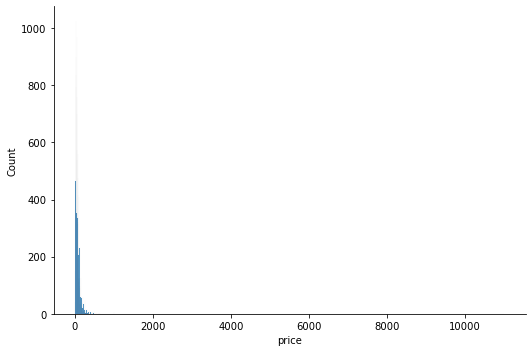

In [23]:
sns.displot(data=data, x="price", kind="hist", aspect=1.5)

#### data is highly screwed

In [24]:
data_price = data[data.price<500] #remove extreme outliers
#data_price = data[data.price!=0] #remove data where price is zero
#take log of price
#data.loc[:,"log_price"] = np.log(data.loc[:,"price"])

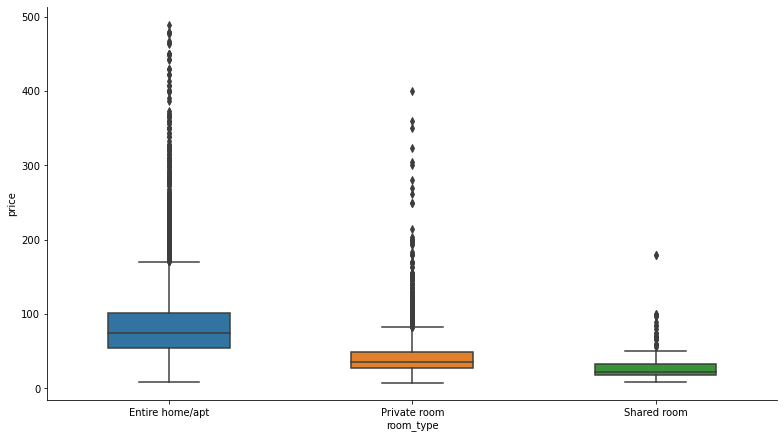

In [25]:
sns.catplot(
    data=data_price, 
    x='room_type', y='price', kind='box',
    height=6, aspect=1.8, width=0.5)

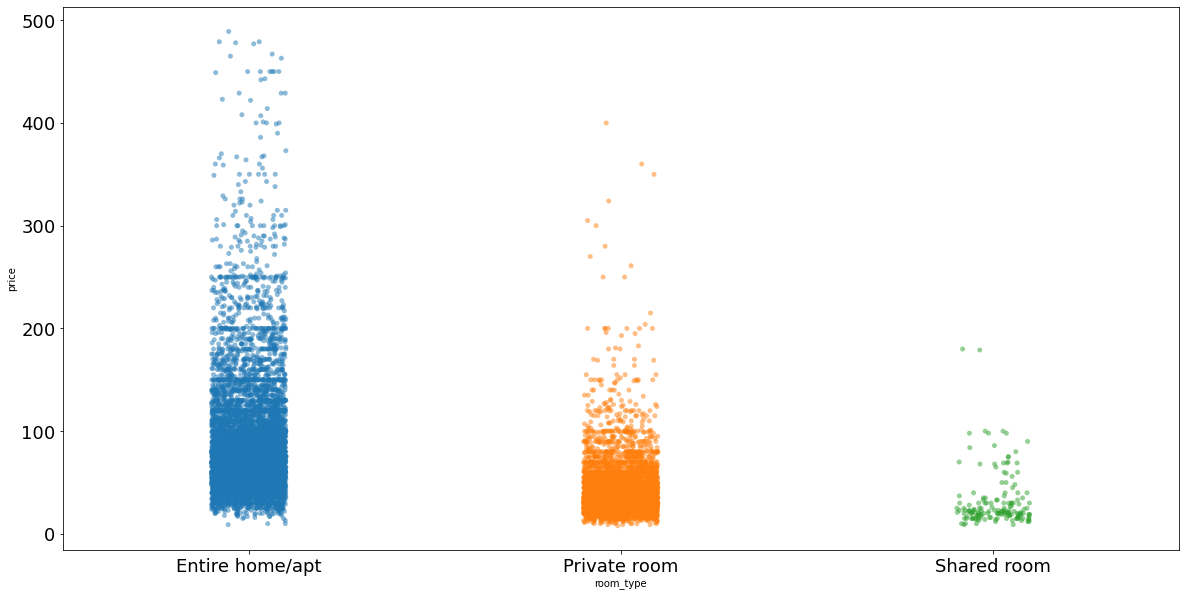

In [93]:
#f1 = plt.figure(1)

plt.figure(figsize=(20, 10))

sns.stripplot(x="room_type", y="price", data=data_price,jitter=True,alpha=0.5)
plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
#plt.figure(1)
plt.savefig('room_type_price.png', bbox_inches='tight', pad_inches=0)


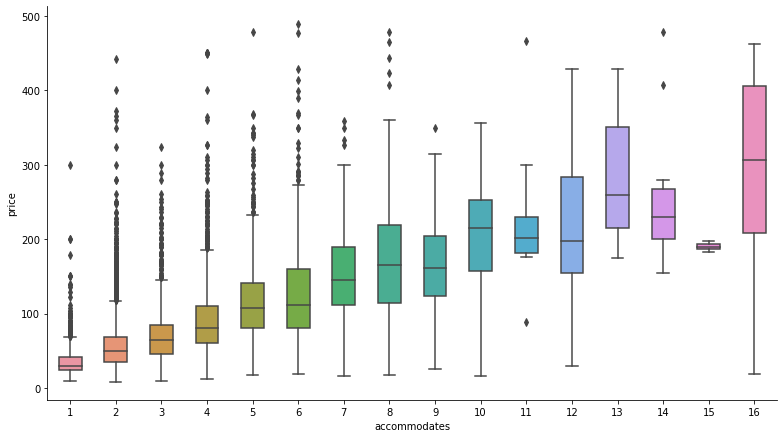

In [26]:
sns.catplot(
    data=data_price, 
    x='accommodates', y='price', kind='box',
    height=6, aspect=1.8, width=0.5
)

### of course the prize should increase with the number of people a property can accomodate

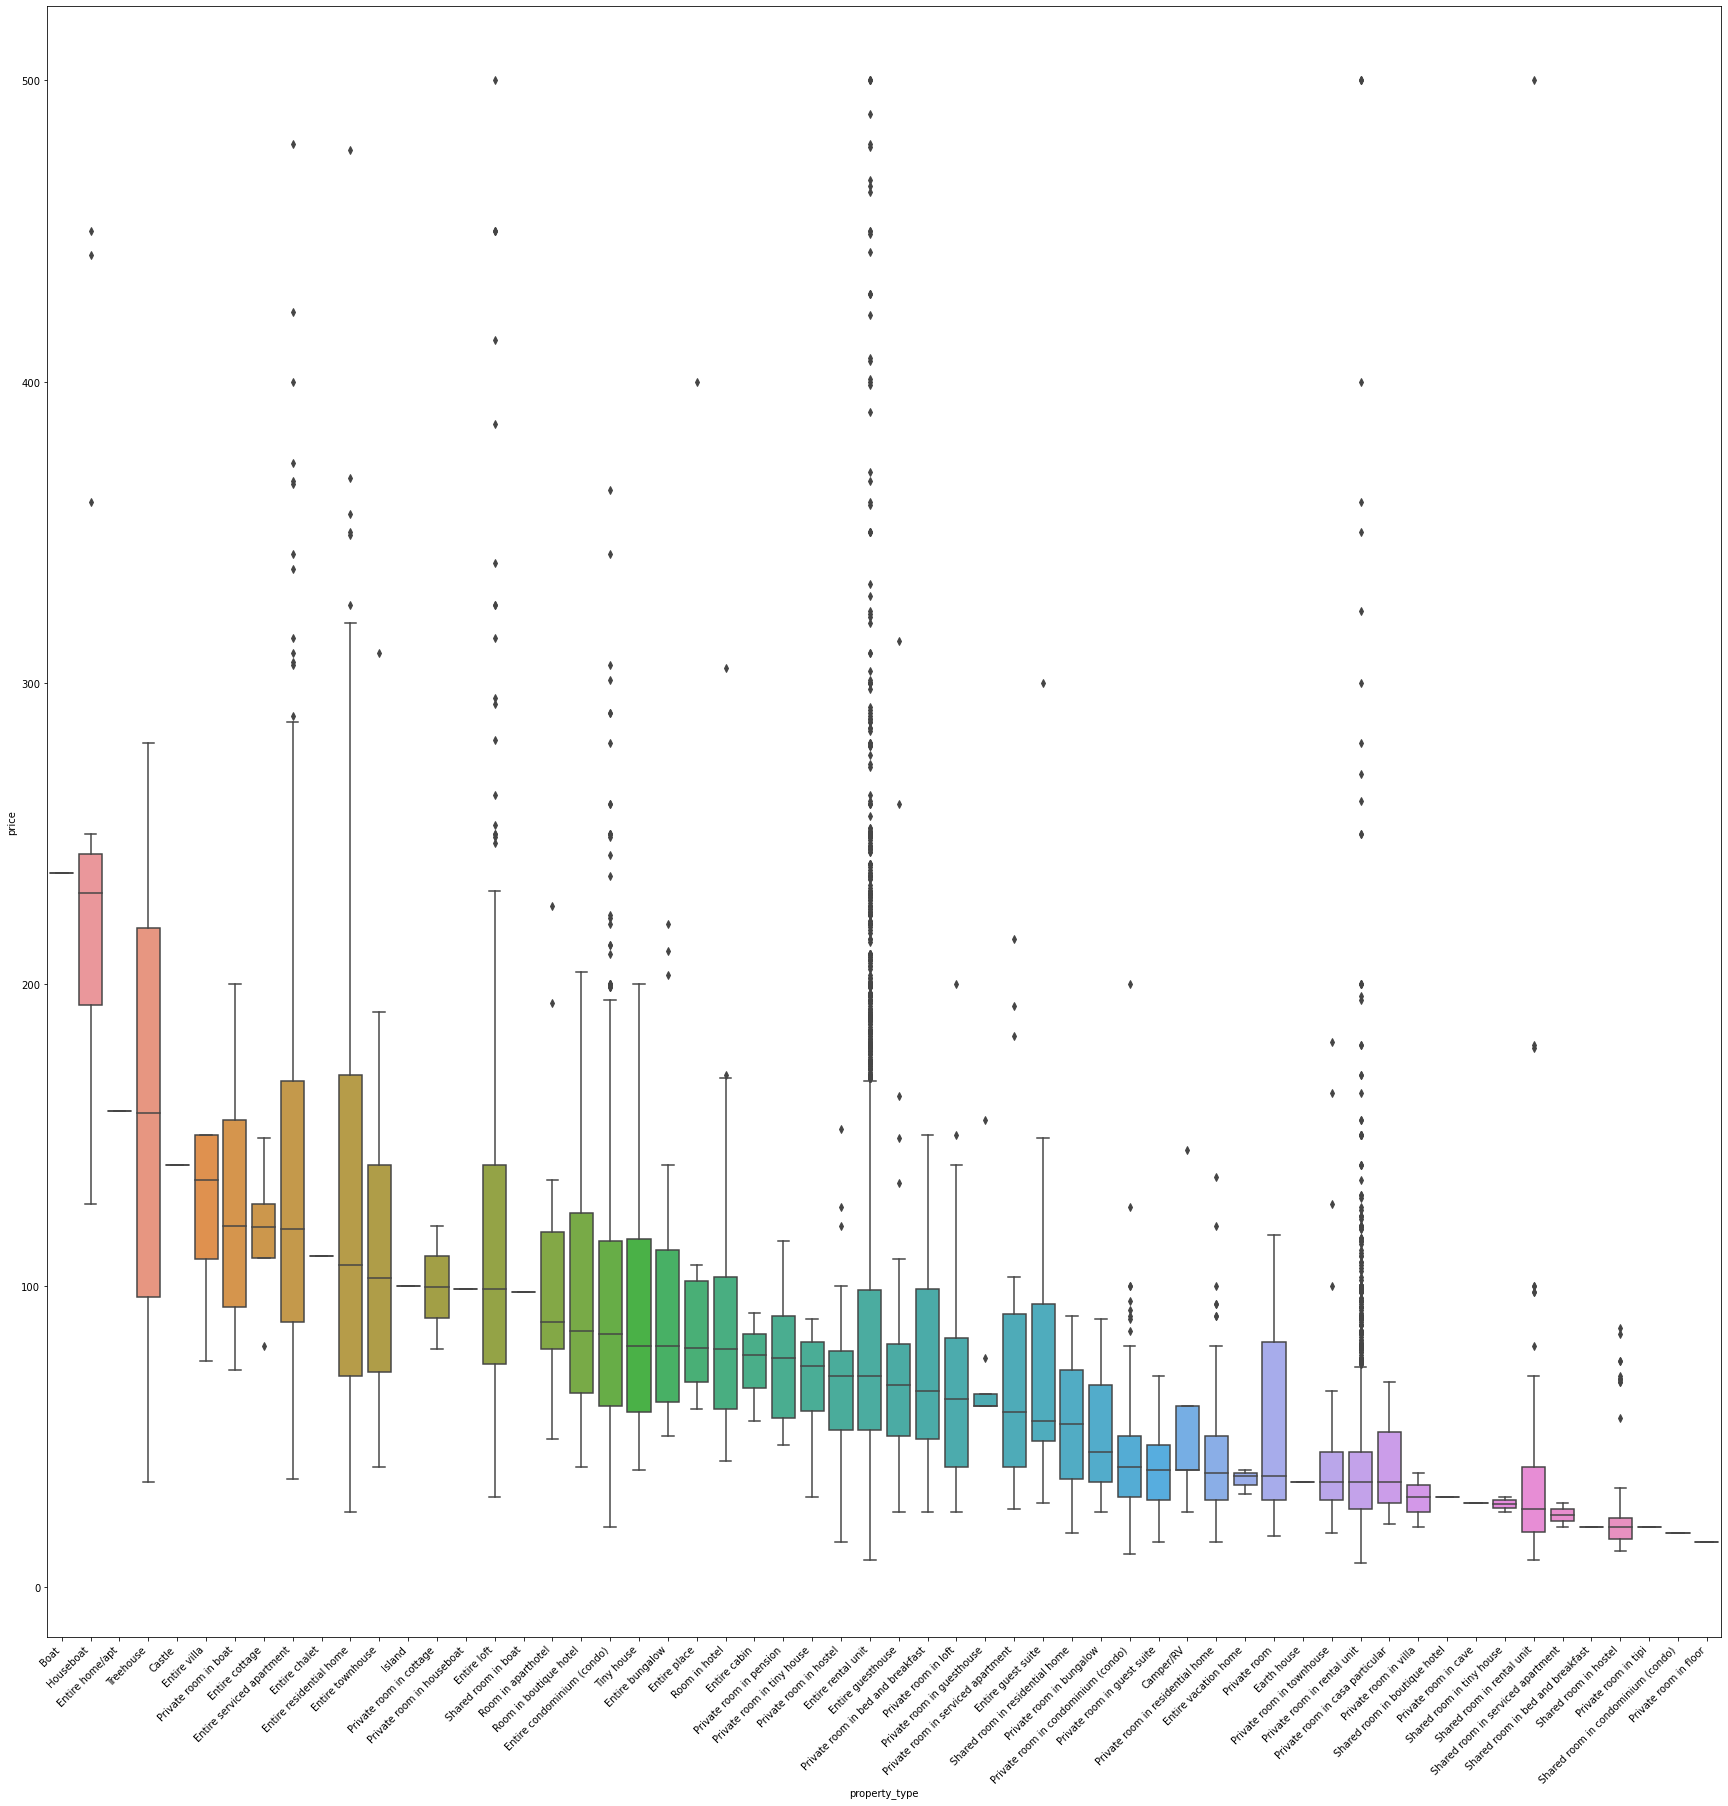

In [27]:
sort_price = data.loc[(data.price <= 500) & (data.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
plt.figure(figsize=(30, 30))
sns.boxplot(y='price', x='property_type', data=data.loc[(data.price <= 500) & (data.price > 0)], order=sort_price)
ax = plt.gca()

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show();

### some propertie types just have a few values, therefore this plots are not for every category meaningful

In [96]:
data.loc[(data.price <= 500) & (data.price > 0)]\
                    .groupby('property_type')['price']\
                    .mean()\
                    .sort_values(ascending=False)

property_type
Houseboat                              244.250000
Boat                                   237.000000
Entire home/apt                        158.000000
Treehouse                              157.500000
Entire serviced apartment              140.226481
Castle                                 140.000000
Entire residential home                132.230088
Entire place                           131.833333
Private room in boat                   128.000000
Entire villa                           123.750000
Entire loft                            120.964158
Entire townhouse                       117.833333
Entire cottage                         117.000000
Entire chalet                          110.000000
Entire bungalow                        101.000000
Room in aparthotel                     100.523810
Island                                 100.000000
Private room in cottage                 99.500000
Private room in houseboat               99.000000
Shared room in boat                 

### prices for different property types: boat, houseboat most expensive

# percentage of available room types

In [28]:
perc_room_type=pd.DataFrame(round(data.room_type.value_counts(normalize=True)*100,2)).reset_index()
labels = pd.Series(['Entire home','Private room','Shared room'])
perc_room_type['labels']=labels
perc_room_type

,index,room_type,labels
0,Entire home/apt,57.93,Entire home
1,Private room,40.93,Private room
2,Shared room,1.14,Shared room


In [107]:
fig = px.pie(perc_room_type, names = 'labels', values='room_type', 
             title='Percentage of different room types',
            color_discrete_sequence = px.colors.sequential.Turbo)
fig.show()
plt.savefig('percentage_room_types.png', bbox_inches='tight', pad_inches=0)


<Figure size 432x288 with 0 Axes>

# review scores: airbnb has a general trend to have exlcuisvely positive ratings

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



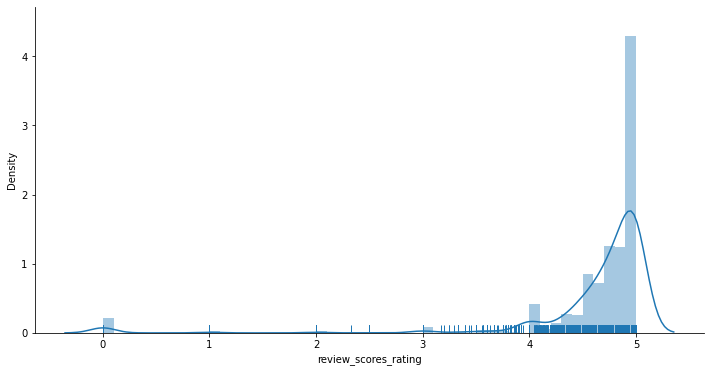

In [30]:

plt.figure(figsize=(12,6))
sns.distplot(data.review_scores_rating, rug=True)
sns.despine()
plt.show();

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/test/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2056: FutureWarning:

The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.



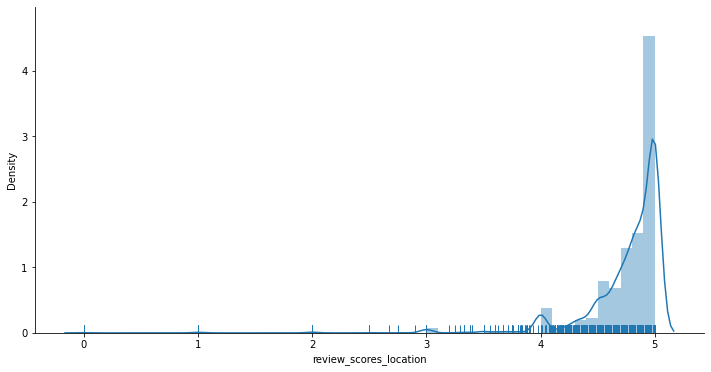

In [31]:
#location rating
plt.figure(figsize=(12,6))
sns.distplot(data.review_scores_location, rug=True)
sns.despine()
plt.show();

# price in neighbourhoods

I have never worked with folium, thats why
github.com/katherineedgley/Airbnb-Berlin-Analysi
helped a lot

In [32]:
#remove extreme outliers in price
display(data.shape)
data_clean=data[data['price'] < 300]
display(data_clean.shape)
#data_clean=data[data['calculated_host_listings_count']>1]
#display(data_clean.shape)

(13883, 120)

(13732, 120)

In [33]:
#take only listings that have at least one review --> sroted that already out in data cleaning steps
data[data['number_of_reviews']==0].shape

(0, 120)

In [34]:
#select neighbourhoods, price and gero parameters
reviews_neighbourhood = data_clean[['neighbourhood_group_cleansed',
                                    'neighbourhood_cleansed',
                                    'price',
                                    'latitude','longitude']].copy()
reviews_neighbourhood                                  

,neighbourhood_group_cleansed,neighbourhood_cleansed,price,latitude,longitude
0,Mitte,Brunnenstr. Süd,53.0,52.533050,13.403940
1,Pankow,Prenzlauer Berg Südwest,90.0,52.534710,13.418100
2,Pankow,Helmholtzplatz,33.0,52.543010,13.415340
3,Pankow,Prenzlauer Berg Südwest,180.0,52.532690,13.418050
4,Pankow,Prenzlauer Berg Nordwest,70.0,52.548130,13.403660
...,...,...,...,...,...
13878,Neukölln,Neuköllner Mitte/Zentrum,85.0,52.481680,13.433052
13879,Lichtenberg,Neu Lichtenberg,100.0,52.500180,13.488640
13880,Tempelhof - Schöneberg,Schöneberg-Nord,126.0,52.492890,13.359740
13881,Neukölln,Neuköllner Mitte/Zentrum,43.0,52.471170,13.433469


In [35]:
#groupby neighbourhood, get mean price
reviews_grouped = reviews_neighbourhood.groupby(['neighbourhood_cleansed'])[['price']].agg(['mean','median',
                                                                                                  'count'])
reviews_grouped

price             
                             mean median count
neighbourhood_cleansed                        
Adlershof               63.950000   59.5    20
Albrechtstr.            51.803279   44.0    61
Alexanderplatz          86.992638   75.0   815
Allende-Viertel         35.333333   35.0     3
Alt  Treptow            61.276190   52.0   105
...                           ...    ...   ...
Wilhelmstadt            61.379310   60.0    29
Zehlendorf  Nord        74.782609   58.0    46
Zehlendorf  Südwest     75.178571   71.0    28
nördliche Luisenstadt   69.705179   55.0   251
südliche Luisenstadt    68.740920   56.0   413

[138 rows x 3 columns]

In [36]:
#round price
reviews_grouped['price']  = reviews_grouped.price.apply(lambda x: round(x,2))

#after groupby column names need to be cleaned
reviews_grouped.columns = ['_'.join(col).strip() for col in reviews_grouped.columns.values]

#if there are not to many listings in a neigbourhood make it nan
reviews_grouped.loc[reviews_grouped.price_count < 20,'price_mean'] = np.nan
reviews_grouped.reset_index(inplace=True)


In [37]:
reviews_grouped.price_count.mean()

99.5072463768116

In [38]:
reviews_grouped.price_count.std()

156.20879001673882

In [39]:
reviews_grouped

,neighbourhood_cleansed,price_mean,price_median,price_count
0,Adlershof,63.95,59.5,20.0
1,Albrechtstr.,51.80,44.0,61.0
2,Alexanderplatz,86.99,75.0,815.0
3,Allende-Viertel,NaN,35.0,3.0
4,Alt Treptow,61.28,52.0,105.0
...,...,...,...,...
133,Wilhelmstadt,61.38,60.0,29.0
134,Zehlendorf Nord,74.78,58.0,46.0
135,Zehlendorf Südwest,75.18,71.0,28.0
136,nördliche Luisenstadt,69.71,55.0,251.0


In [40]:
#colormap for visualization
from branca.colormap import linear
colormap = linear.OrRd_09.scale(
    reviews_grouped.price_mean.min(),
    reviews_grouped.price_mean.max())

In [41]:
#load geopandas dataframe
import geopandas as gpd
geo_df = gpd.read_file('neighbourhoods.geojson')

In [42]:
#merge dataframes together
gdf_price = geo_df.merge(reviews_grouped, left_on='neighbourhood', 
                               right_on = 'neighbourhood_cleansed')
gdf_price.head()

,neighbourhood,neighbourhood_group,geometry,neighbourhood_cleansed,price_mean,price_median,price_count
0,Blankenfelde/Niederschönhausen,Pankow,"MULTIPOLYGON (((13.41191 52.61487, 13.41183 52...",Blankenfelde/Niederschönhausen,74.03,69.0,33.0
1,Helmholtzplatz,Pankow,"MULTIPOLYGON (((13.41405 52.54929, 13.41422 52...",Helmholtzplatz,77.35,68.0,268.0
2,Wiesbadener Straße,Charlottenburg-Wilm.,"MULTIPOLYGON (((13.30748 52.46788, 13.30743 52...",Wiesbadener Straße,67.03,47.5,30.0
3,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,"MULTIPOLYGON (((13.70973 52.39630, 13.70926 52...",Schmöckwitz/Karolinenhof/Rauchfangswerder,NaN,78.5,18.0
4,Müggelheim,Treptow - Köpenick,"MULTIPOLYGON (((13.73762 52.40850, 13.73773 52...",Müggelheim,NaN,107.0,11.0


In [43]:
#make actual map
import folium
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap

style_function = lambda x: {'weight': 0.5,
                           'fillColor': '#8c8c8c',
                           'fillOpacity': 0,
                           'color': 'black'} if pd.isnull(x['properties']['price_mean'])else {'weight': 0.5,
                                                                                             'fillColor': colormap(x['properties']['price_mean']),
                                                                                             'fillOpacity': .75,
                                                                                             'color': 'black'}
styles= folium.features.GeoJson(
    gdf_price,
    style_function=style_function,
    tooltip=folium.features.GeoJsonTooltip(
        fields=['neighbourhood','price_mean','price_count'],
        aliases = ['District: ','Average Price: ','number of Listings']))

In [44]:
m = folium.Map(location=[52.51, 13.40], zoom_start=10, tiles='cartodbpositron')

colormap.caption = 'Average Price'
colormap.add_to(m)

m.add_child(styles)

### how many listings that have an international hosts which has 1 or more properties



In [166]:
#get data where host is not from germany
international=data[data['Host_location_germany']==0]
international.shape

(897, 120)

In [47]:
#function thans bins: listings:host_id and host_listings_count and availability

def host_binning(bins, labels, hosts = False):
    #groupby or copy dataframe
    if hosts:
        df = international.groupby('host_id')[['calculated_host_listings_count',
                                             'availability_365']].mean()
    else:
        df = international.copy()
        
  
    df['num_listings_cut'] = pd.cut(df.calculated_host_listings_count, bins)
    num_listings_percent = df.num_listings_cut.value_counts(normalize=True)  # get percentage

    # get availability
    availability_num_listings = pd.DataFrame(df.groupby('num_listings_cut')['availability_365'].mean()).reset_index()

    # make dataframe
    df = pd.DataFrame(num_listings_percent).reset_index().rename(columns = {'index': 'cut', 
                                                                            'num_listings_cut': 'perc_listings'})
    # sort,concat,merge
    df = df.sort_values(by='cut').reset_index(drop=True) 
    df = pd.concat([labels, df], axis=1).rename(columns = {0: 'labels'})
    df = df.merge(availability_num_listings, left_on='cut', 
                           right_on='num_listings_cut').drop(columns = 'num_listings_cut')
    
    # rounded percantage
    df['perc_listings_clean'] = df.perc_listings.apply(
        lambda x: 100*round(x,4))
    
    return df

In [48]:
#make bins
bins = pd.IntervalIndex.from_tuples([(-1, 1), (1, 3),(3,10),(10,100)])

#get labels
labels = pd.Series(['1 Listing','2-3 Listings','4-10 Listings','11+ Listings'])

# create the dataframe
listings_info_df = host_binning(bins, labels)

listings_info_df = listings_info_df.rename(columns = {'labels': 'Host Listings',
                                                     'perc_listings': 'Percentage of Listings'})
listings_info_df

fig = px.pie(listings_info_df, names = 'Host Listings', values='Percentage of Listings', 
             title='Percentage of listings with an international host that owns 1 or more property',
            color_discrete_sequence = px.colors.sequential.Peach)
fig.show()

### one quarter of listing with international hosts have more than one listing, that is comparable to the overall numbers from all berlin listings as seen in a similar previous graph

### how many international hosts have more than one listing in berlin: 747


In [172]:
#drop duplicate listings (same host id several times)
international=international.drop_duplicates(subset='host_id')
international.shape

(747, 120)

In [173]:
#get for each city the number of hosts
#sometimes only country abbreviation letter is included like US

city=international['host_location'].map(lambda index: index.split(",")[0]).value_counts()
city.head(20)

London            35
US                19
Barcelona         19
New York          17
Rome              16
Milan             14
Madrid            13
Vienna            12
England           11
ES                11
Zürich            11
Greater London    10
United States     10
FR                10
Amsterdam          9
Moscow             8
GB                 8
Tel Aviv-Yafo      7
Brussels           7
Zurich             7
Name: host_location, dtype: int64

In [181]:
city_df=pd.DataFrame(city).reset_index().head(26)
city_df

,index,host_location
0,London,35
1,US,19
2,Barcelona,19
3,New York,17
4,Rome,16
5,Milan,14
6,Madrid,13
7,Vienna,12
8,England,11
9,ES,11


In [182]:
# delete the one where we only know country code
city_df = city_df.drop([city_df.index[1],city_df.index[9],city_df.index[10],city_df.index[12],city_df.index[13],city_df.index[16]])
city_df=city_df.reset_index()
city_df

,level_0,index,host_location
0,0,London,35
1,2,Barcelona,19
2,3,New York,17
3,4,Rome,16
4,5,Milan,14
5,6,Madrid,13
6,7,Vienna,12
7,8,England,11
8,11,Greater London,10
9,14,Amsterdam,9


In [183]:
city_df= city_df.astype({"index": str})

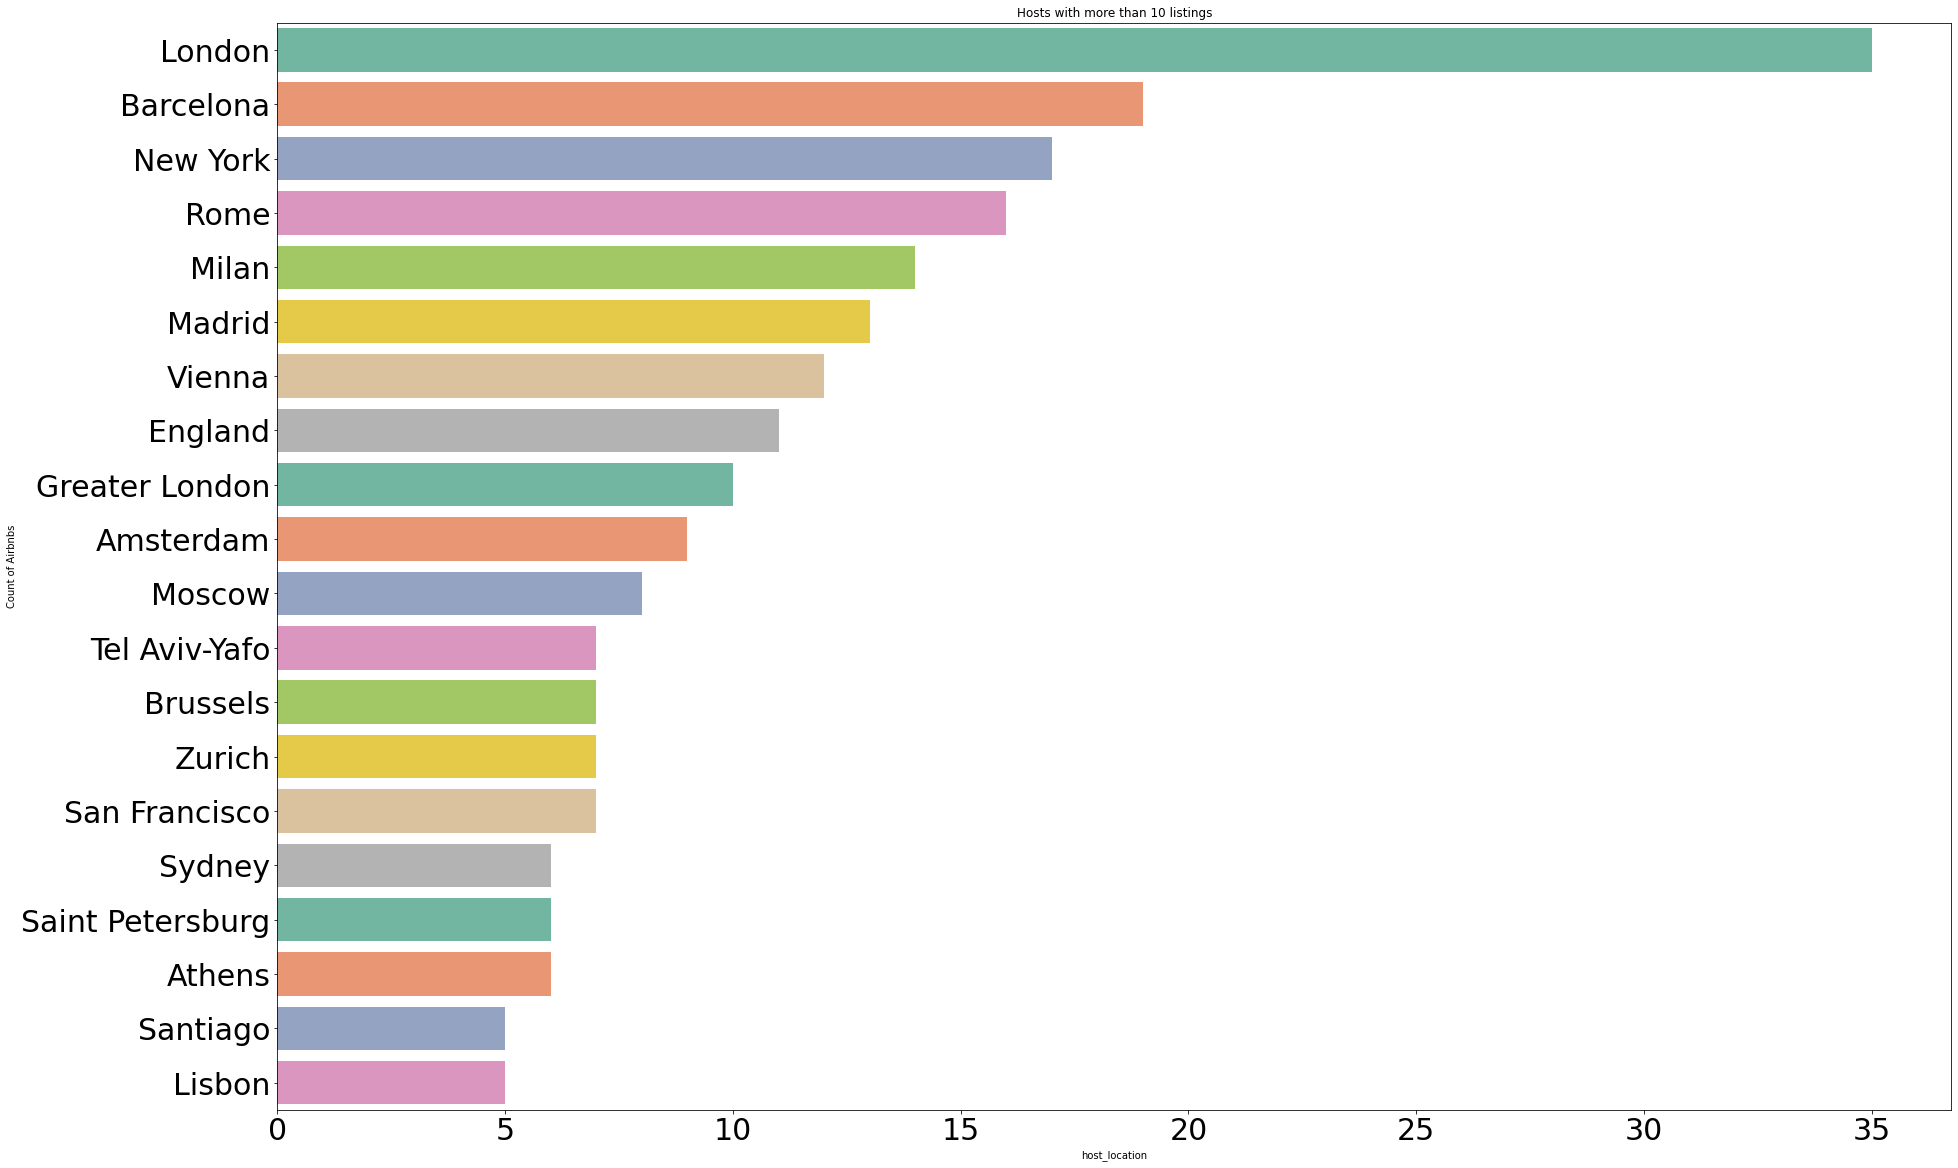

In [184]:
fig, ax = plt.subplots(figsize=(30,20))

ht=sns.barplot(x="host_location", y="index", data=city_df,
                 palette='Set2')
ht.set_title('Hosts with more than 10 listings')
ht.set_ylabel('Count of Airbnbs')

plt.yticks(fontsize= 30)
plt.xticks(fontsize= 30)
plt.savefig('international_host.png', bbox_inches='tight', pad_inches=0)

#for item in ht.get_xticklabels():
    #item.set_rotation(90)

### international hosts come most often from london, barcelona, rome so europe: only a few from moscow, san fransicsco, tel aviv, sydney

# average minimum stay

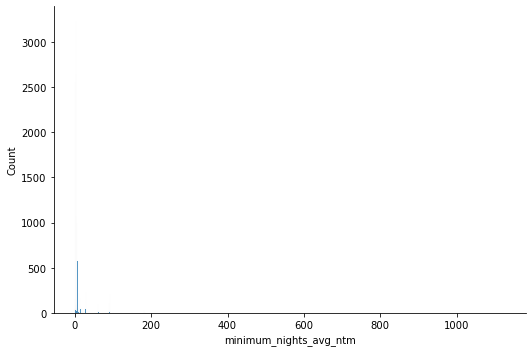

In [55]:
sns.displot(data=data, x="minimum_nights_avg_ntm", kind="hist", aspect=1.5)

In [56]:
#highly screwed
#for most listings the average minimum night value from the calander is not beyond 92 days
data.minimum_nights_avg_ntm.value_counts().head(30)

2.0      3172
3.0      2566
1.0      2445
4.0      1044
5.0       976
7.0       575
6.0       285
30.0      236
10.0      215
92.0      210
14.0      164
1.3       125
90.0      105
60.0      104
1.1        75
2.8        69
3.1        66
20.0       61
8.0        54
2.1        48
2.7        48
28.0       46
21.0       40
15.0       38
1.2        37
2.3        37
12.0       35
180.0      33
1.6        31
3.3        29
Name: minimum_nights_avg_ntm, dtype: int64

In [57]:
#data_night=data[data['minimum_nights_avg_ntm']<=92]
#data_night.shape

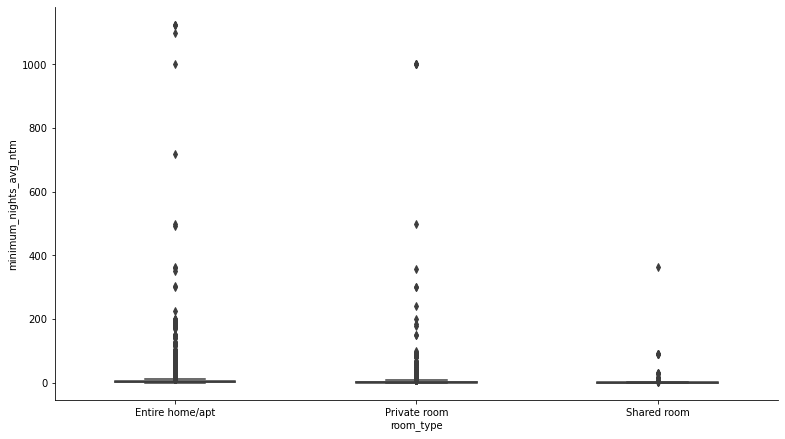

In [58]:
sns.catplot(
    data=data, 
    x='room_type', y='minimum_nights_avg_ntm', kind='box',
    height=6, aspect=1.8, width=0.5)

#### quantile filtering of outliers

In [59]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(data.minimum_nights_avg_ntm)


In [60]:
data_filt=data.drop(data[ (data.minimum_nights_avg_ntm > upperbound) | (data.minimum_nights_avg_ntm < lowerbound) ].index)

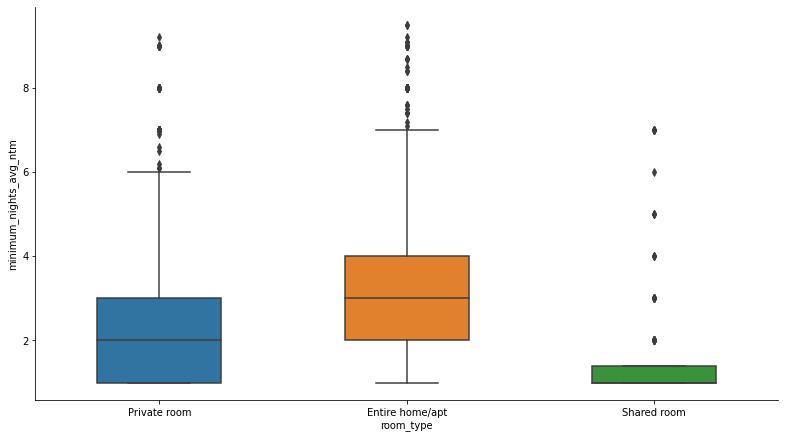

In [61]:
sns.catplot(
    data=data_filt, 
    x='room_type', y='minimum_nights_avg_ntm', kind='box',
    height=6, aspect=1.8, width=0.5)

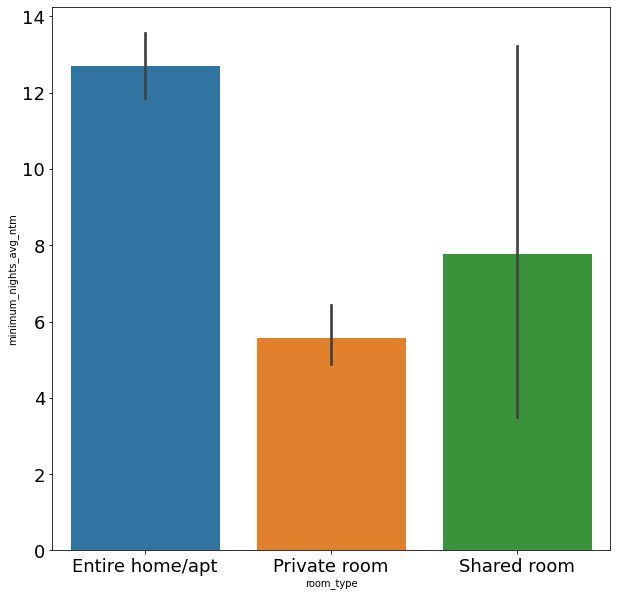

In [121]:
plt.figure(figsize=(10, 10))

sns.barplot(x="room_type", y="minimum_nights_avg_ntm", data=data)
plt.yticks(fontsize= 18)
plt.xticks(fontsize= 18)
#plt.figure(1)
plt.savefig('average_nights.png', bbox_inches='tight', pad_inches=0)